In [78]:
# import useful libraries
import pandas as pd
import yfinance as yf
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

# Question 1: Use yfinance to Extract Stock Data

In [79]:
# using Ticker from yfinance aand extracting data from TSLA
tesla = yf.Ticker("TSLA")
# use history to fetch and procsess data
tesla_data = tesla.history(period="max")
#reset index
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


# Question 2: Use Webscraping to Extract Tesla Revenue Data

In [86]:
tesla_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
tesla_web_data = requests.get(tesla_url).text
b_soup = BeautifulSoup(tesla_web_data, 'html.parser')

# reading data
table = pd.read_html(tesla_url)[0]
table.columns = ["Date", "Revenue"]
tesla_revenue = table[table["Revenue"] != "Tesla Annual Revenue"]
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',',"")
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace('$',"")
# display the data using tail()
tesla_revenue.tail()

,Date,Revenue
8,2013,2013
9,2012,413
10,2011,204
11,2010,117
12,2009,112


# Question 3: Use yfinance to Extract Stock Data

In [84]:
# using stock data GameStop and its symbol to use is GME
game_stop = yf.Ticker("GME")
gme_data = game_stop.history(period="max")
# reset index 
gme_data.reset_index(inplace=True)
gme_data=pd.DataFrame(gme_data)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


# Question 4: Use Webscraping to Extract GME Revenue Data

In [81]:
gme_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
gme_data  = requests.get(gme_url).text
# parse the web data 
soup = BeautifulSoup(gme_data, 'html.parser')
# extracting data
gme_revenue = pd.read_html(gme_url)[0]
gme_revenue.columns = ["Date", "Revenue"]
gme_revenue = gme_revenue[gme_revenue["Revenue"] != "gme Annual Revenue"]
gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(',',"")
gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace('$',"")
gme_revenue.tail()

,Date,Revenue
11,2009,8806
12,2008,7094
13,2007,5319
14,2006,3092
15,2005,1843


# Question 5: Plot Tesla Stock Graph

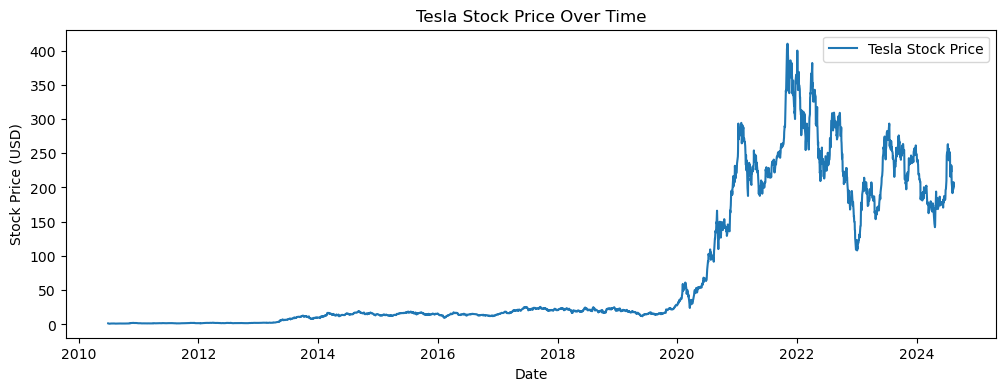

In [87]:
def make_graph(data):
    # Converting Date to datetime if bnot in datetime coorect format
    data['Date'] = pd.to_datetime(data['Date'])

    # Plotting Tesla stock data
    plt.figure(figsize=(12, 4))
    plt.plot(data['Date'], data['Close'], label='Tesla Stock Price')

    # Adding title and labels
    plt.title('Tesla Stock Price Over Time')
    plt.xlabel('Date')
    plt.ylabel('Stock Price (USD)')

    # Display the graph
    plt.legend()
    plt.show()

# Call the function to generate the graph
make_graph(tesla_data)

# Question 6: Plot GameStop Stock Graph

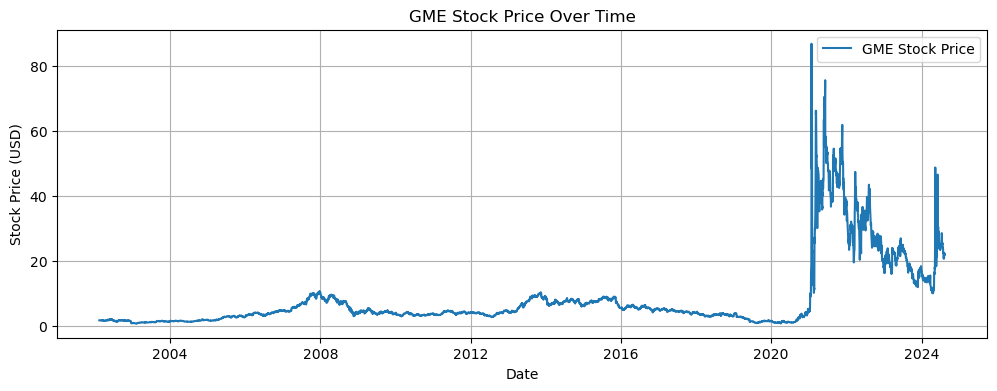

In [89]:
def make_graph(data):
    # Converting Date to datetime if bnot in datetime coorect format
    data['Date'] = pd.to_datetime(data['Date'])

    # Plotting GameStop stock data
    plt.figure(figsize=(12, 4))
    plt.plot(data['Date'], data['Close'], label='GME Stock Price')

    # Adding title and labels
    plt.title('GME Stock Price Over Time')
    plt.xlabel('Date')
    plt.ylabel('Stock Price (USD)')

    # Display the graph
    plt.legend()
    plt.grid(True)
    plt.show()

# Call the function to generate the graph
make_graph(gme_data)